## **Trabalhando com Datas - Excell**

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Salvador.xlsx")

In [ ]:
df = pd.concat([df1, df2, df3, df4 ,df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
#Transformando a coluna de datas em tipo inteiro
df["Data"] = df["Data"].astype("int64")

<ipython-input-8-4207d5094d72>:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df["Data"] = df["Data"].astype("int64")


In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#Transformando a coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes


Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()
#Vai retornar a receita por ano

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
141,Recife,2019-03-02,182.75,983,8,1462.00,2019
98,Aracaju,2018-01-01,138.33,1521,10,1383.30,2018
62,Recife,2019-01-01,23.04,983,6,138.24,2019
21,Aracaju,2018-01-01,37.36,1520,2,74.72,2018
66,Aracaju,2018-01-01,76.59,1523,4,306.36,2018


In [ ]:
#Criando a coluna mês e dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
74,Salvador,2019-01-01,170.53,1035,2,341.06,2019,1,1
2,Recife,2019-02-10,12.94,983,5,64.70,2019,2,10
95,Salvador,2019-01-01,5.13,1035,1,5.13,2019,1,1
49,Natal,2019-04-01,831.00,852,2,1662.00,2019,4,1
200,Salvador,2019-01-02,41.06,1035,1,41.06,2019,1,2


In [ ]:
#Retornando a data mais antiga 
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando a diferença de dias
df["Diferença_Dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,Diferença_Dias
42,Aracaju,2018-01-01,40.00,1520,8,320.00,2018,1,1,0 days
147,Salvador,2019-01-02,34.50,1035,1,34.50,2019,1,2,366 days
133,Fortaleza,2019-03-02,14.67,980,7,102.69,2019,3,2,425 days
114,Natal,2019-01-02,25.52,1034,1,25.52,2019,1,2,366 days
110,Natal,2019-01-02,185.93,1036,3,557.79,2019,1,2,366 days


In [ ]:
#Criando a coluna com trimestre
df["Trimestre_Venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,Diferença_Dias,Trimestre_Venda
38,Salvador,2019-01-01,165.34,1034,3,496.02,2019,1,1,365 days,1
50,Salvador,2019-01-01,44.87,1036,3,134.61,2019,1,1,365 days,1
20,Natal,2018-06-08,608.00,852,4,2432.00,2018,6,8,158 days,2
35,Natal,2018-01-18,552.00,852,2,1104.00,2018,1,18,17 days,1
170,Natal,2019-01-02,9.26,1035,3,27.78,2019,1,2,366 days,1
234,Salvador,2019-01-03,48.39,1035,2,96.78,2019,1,3,367 days,1


In [ ]:
#Filtrando as vendas de 2019 do mês de março
vendas_março_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)] 


In [ ]:
vendas_março_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,Diferença_Dias,Trimestre_Venda
69,Natal,2019-03-24,817.00,852,4,3268.00,2019,3,24,447 days,1
71,Natal,2019-03-20,840.00,854,3,2520.00,2019,3,20,443 days,1
128,Salvador,2019-03-02,36.84,1034,1,36.84,2019,3,2,425 days,1
42,Natal,2019-03-02,775.00,854,2,1550.00,2019,3,2,425 days,1
116,Fortaleza,2019-03-02,79.10,982,2,158.20,2019,3,2,425 days,1


# **Visualização de Dados**

In [ ]:
#Verificou quantas linhas cada loja id tinha - a qtd de linhas é equivalente as vendas realizadas
df["LojaID"].value_counts(ascending = False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

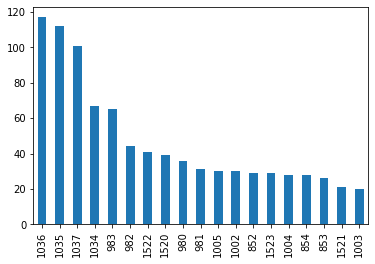

In [ ]:
#Grafico de Barras
df["LojaID"].value_counts(ascending = False).plot.bar()

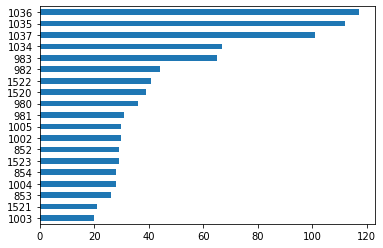

In [ ]:
#Grafico de barras horizontais
df["LojaID"].value_counts(ascending = True).plot.barh(); 
#Ascending define a ordem do grafico (maior para menor ou vice-versa)

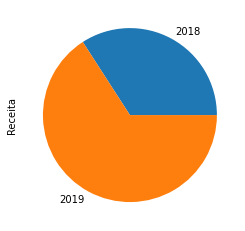

In [ ]:
#Grafico Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#Total de Vendas por cidade 
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

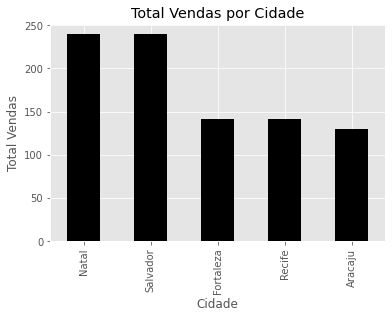

In [ ]:
#Adicionando Titulo para o Grafico e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title = "Total Vendas por Cidade", color = "black")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#Alterar o estilo dos graficos por meio do site do matplotlib é possivel pegar os códigos dos estilos
plt.style.use("ggplot")
#ggplot é o nome do estilo

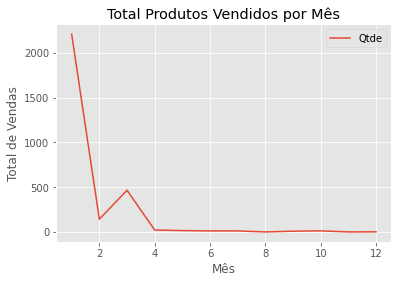

In [ ]:
#Grafico de linhas 
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Vendas")
plt.legend();

In [ ]:
#Qtde de venda por mês
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecionar apenas o ano de 2019
df_2019 = df[df["Ano_Venda"]== 2019]

In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

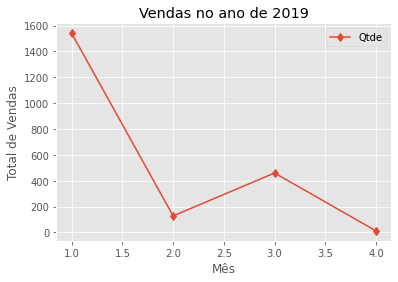

In [ ]:
#Total de produtos vendidos por mês no ano de 2019
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "d", title = "Vendas no ano de 2019")
#Marker serve pra criar esses pontinhos no grafico pode ser o, v, s, d
plt.xlabel("Mês")
plt.ylabel("Total de Vendas");
plt.legend();

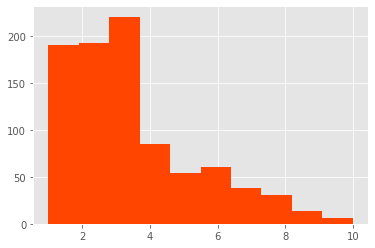

In [ ]:
#Histograma
plt.hist(df["Qtde"], color = "orangered");

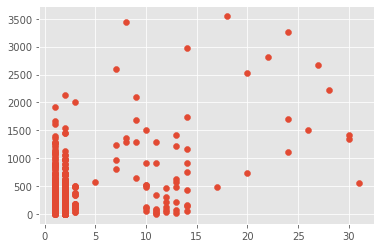

In [ ]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

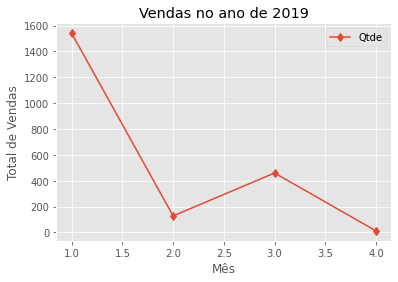

In [ ]:
#Salvando em PNG
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "d", title = "Vendas no ano de 2019")
plt.xlabel("Mês")
plt.ylabel("Total de Vendas");
plt.legend();
plt.savefig("Grafico Qtde por mes.png")